In [1]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Load the dataset
data = pd.read_csv('../../../csv/Beras.csv')

data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Tanggal                   678 non-null    object
 1   Luas Panen Padi           678 non-null    int64 
 2   GKP Tingkat Petani        678 non-null    int64 
 3   GKP Tingkat Penggilingan  678 non-null    int64 
 4   GKG Tingkat Penggilingan  678 non-null    int64 
 5   Harga Beras Penggilingan  678 non-null    int64 
 6   Produksi Beras            678 non-null    int64 
 7   Harga Beras               678 non-null    int64 
 8   UMP                       678 non-null    int64 
 9   BBM Solar                 678 non-null    int64 
 10  Tingkat Konsumsi          678 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 58.4+ KB


(      Tanggal  Luas Panen Padi  GKP Tingkat Petani  GKP Tingkat Penggilingan  \
 0  2021-03-15               10                4000                      4150   
 1  2021-03-16               10                3850                      4100   
 2  2021-03-17               10                4160                      4230   
 3  2021-03-18               10                4120                      4190   
 4  2021-03-19               10                4190                      4290   
 
    GKG Tingkat Penggilingan  Harga Beras Penggilingan  Produksi Beras  \
 0                      5050                      9465           14419   
 1                      4740                      9360           14419   
 2                      4950                      9400           14419   
 3                      4730                      9340           14419   
 4                      4990                      9410           14419   
 
    Harga Beras   UMP  BBM Solar  Tingkat Konsumsi  
 0        112

In [3]:
# Convert 'Tanggal' to datetime
data['Tanggal'] = pd.to_datetime(data['Tanggal'])

# Set 'Tanggal' as the index
data.set_index('Tanggal', inplace=True)

In [4]:
column = data['GKP Tingkat Petani']

# Split the data into train and test sets (80:20)
train_series, test_series = train_test_split(column, test_size=0.2, shuffle=False)

In [5]:
# Decompose the train and test data with a specified period of 7 days for weekly seasonality
decomposition_train = sm.tsa.seasonal_decompose(train_series, model='additive', period=7)
decomposition_test = sm.tsa.seasonal_decompose(test_series, model='additive', period=7)

# Collect the components for train data
train_trend = decomposition_train.trend.dropna()
train_seasonal = decomposition_train.seasonal.dropna()
train_residual = decomposition_train.resid.dropna()

# Collect the components for test data
test_trend = decomposition_test.trend.dropna()
test_seasonal = decomposition_test.seasonal.dropna()
test_residual = decomposition_test.resid.dropna()

# Display the components for train data
train_trend.head(), train_seasonal.head(), train_residual.head()

(Tanggal
 2021-03-18    4062.857143
 2021-03-19    4061.428571
 2021-03-22    4081.428571
 2021-03-23    4051.428571
 2021-03-24    4035.714286
 Name: trend, dtype: float64,
 Tanggal
 2021-03-15   -8.080649
 2021-03-16    6.242659
 2021-03-17   -0.016739
 2021-03-18    4.638079
 2021-03-19   -5.083627
 Name: seasonal, dtype: float64,
 Tanggal
 2021-03-18     52.504778
 2021-03-19    133.655056
 2021-03-22    -18.905241
 2021-03-23      3.747820
 2021-03-24    -37.633637
 Name: resid, dtype: float64)

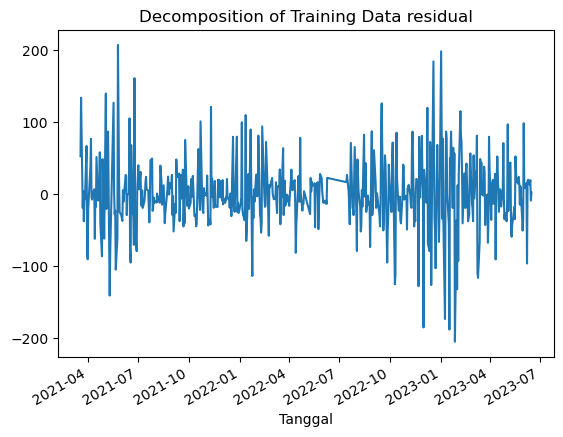

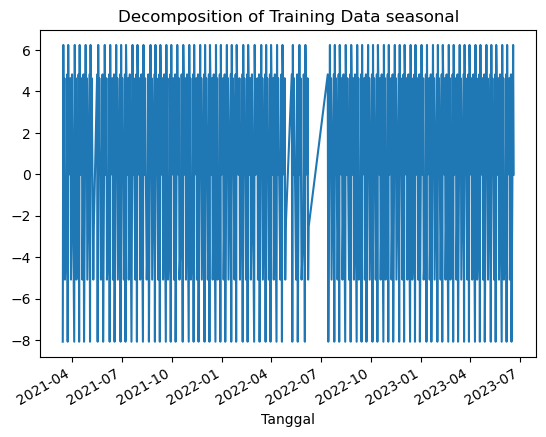

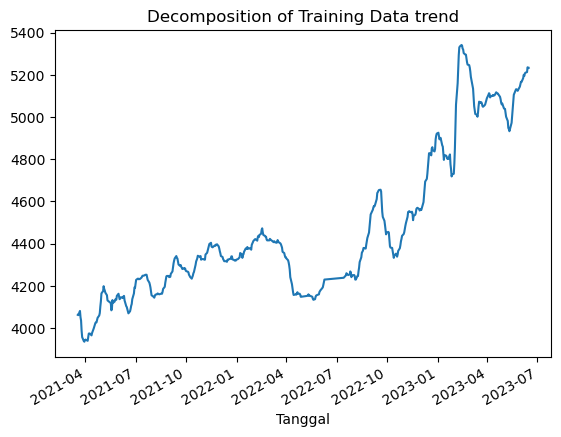

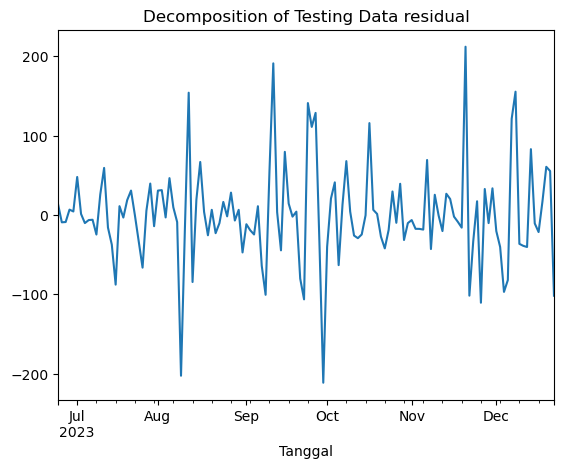

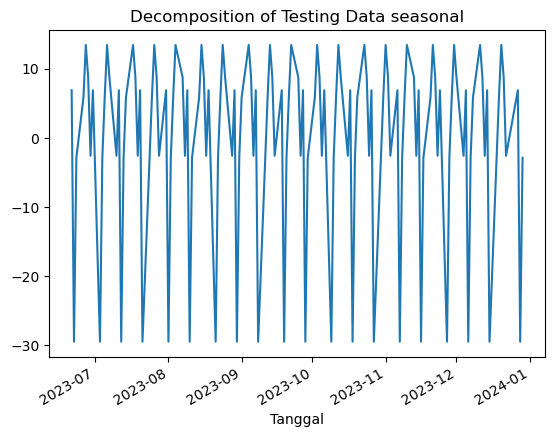

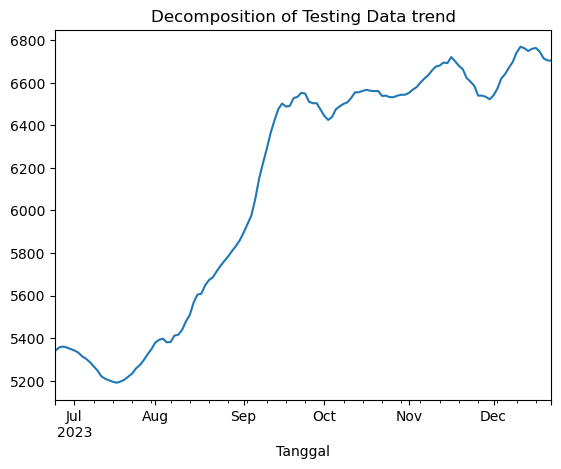

In [6]:
# Plot the decomposed training series
train_residual.plot()
plt.title('Decomposition of Training Data residual')
plt.show()

train_seasonal.plot()
plt.title('Decomposition of Training Data seasonal')
plt.show()

train_trend.plot()
plt.title('Decomposition of Training Data trend')
plt.show()

# Plot the decomposed testing series
test_residual.plot()
plt.title('Decomposition of Testing Data residual')
plt.show()

test_seasonal.plot()
plt.title('Decomposition of Testing Data seasonal')
plt.show()

test_trend.plot()
plt.title('Decomposition of Testing Data trend')
plt.show()

# Residual

In [7]:
# Initialize the Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on training data
random_forest.fit(train_residual.index.values.reshape(-1, 1), train_residual)

# Predict on test data
predictions_residual = random_forest.predict(test_residual.index.values.reshape(-1, 1))

# Calculate the error metrics
mae = mean_absolute_error(test_residual, predictions_residual)
mse = mean_squared_error(test_residual, predictions_residual)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 41.43437823246095
MSE: 3775.239346200056
RMSE: 61.44297637810245


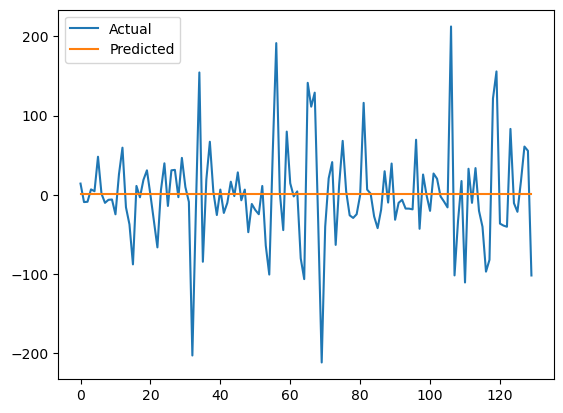

In [8]:
# Plot actual values
plt.plot(test_residual.values, label='Actual')

# Plot predicted values
plt.plot(predictions_residual, label='Predicted')

# Show the legend
plt.legend()

# Show the plot
plt.show()

# Seasonal

In [9]:
# Initialize the Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on training data
random_forest.fit(train_seasonal.index.values.reshape(-1, 1), train_seasonal)

# Predict on test data
predictions_seasonal = random_forest.predict(test_seasonal.index.values.reshape(-1, 1))

# Calculate the error metrics
mae = mean_absolute_error(test_seasonal, predictions_seasonal)
mse = mean_squared_error(test_seasonal, predictions_seasonal)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 9.9060366075116
MSE: 178.9669971198138
RMSE: 13.377854727863276


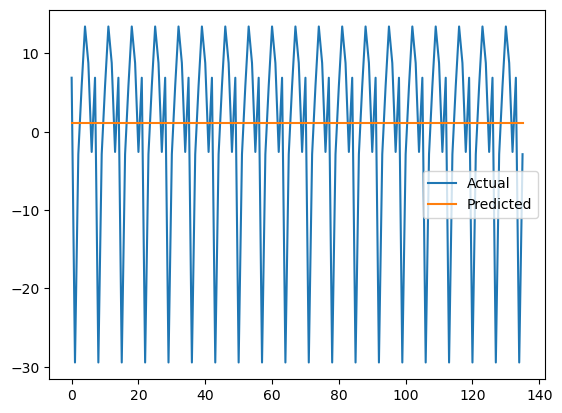

In [10]:
# Plot actual values
plt.plot(test_seasonal.values, label='Actual')

# Plot predicted values
plt.plot(predictions_seasonal, label='Predicted')

# Show the legend
plt.legend()

# Show the plot
plt.show()

# Trend

In [11]:
# Initialize the Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on training data
random_forest.fit(train_trend.index.values.reshape(-1, 1), train_trend)

# Predict on test data
predictions_trend = random_forest.predict(test_trend.index.values.reshape(-1, 1))

# Calculate the error metrics
mae = mean_absolute_error(test_trend, predictions_trend)
mse = mean_squared_error(test_trend, predictions_trend)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 890.5692307692287
MSE: 1114203.4489795875
RMSE: 1055.5583588696493


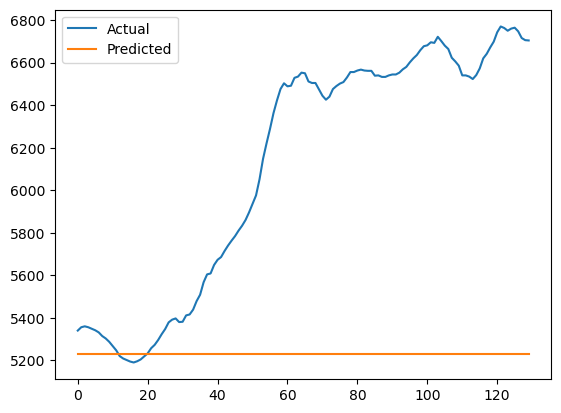

In [12]:
# Plot actual values
plt.plot(test_trend.values, label='Actual')

# Plot predicted values
plt.plot(predictions_trend, label='Predicted')

# Show the legend
plt.legend()

# Show the plot
plt.show()